In [6]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tqdm import tqdm
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa

%matplotlib inline

In [7]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'

In [8]:
words=["yes", "no", "one", "two"]

In [25]:
from pydub import AudioSegment

audio_file= r"C:\Users\Tuf F15\Desktop\test.wav"
audio = AudioSegment.from_wav(audio_file)
list_of_timestamps = [ 10, 20, 30, 40, 50 ,60, 70, 80, 90 ] #and so on in *seconds*

start = 0
for  idx,t in enumerate(list_of_timestamps):
    #break loop if at last element of list
    if idx == len(list_of_timestamps):
        break

    end = t * 1000 #pydub works in millisec
    print ("split at [ {}:{}] ms".format(start, end))
    audio_chunk=audio[start:end]
    audio_chunk.export( "audio_chunk_{}.wav".format(end), format="wav")

    start = end  #pydub works in millisec


FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable

In [17]:
a = os.chdir("C:/Users/Tuf F15/Desktop")
print(a)

None


### Data Visualization

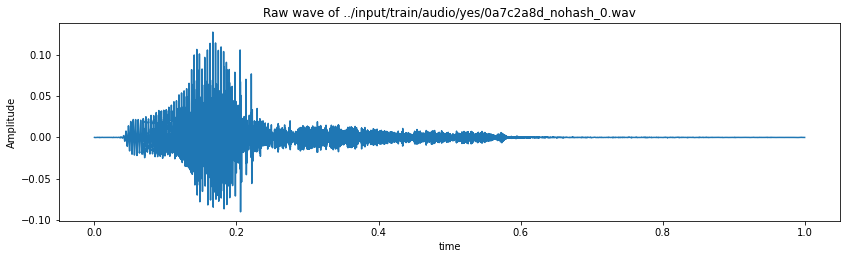

In [9]:
#sample_rate, samples = wavfile.read(audios_dir+'/yes/1a073312_nohash_0.wav')
samples, sample_rate = librosa.load(audios_dir+'/yes/1a073312_nohash_0.wav')
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

<ipython-input-10-f5eca4a0244f>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


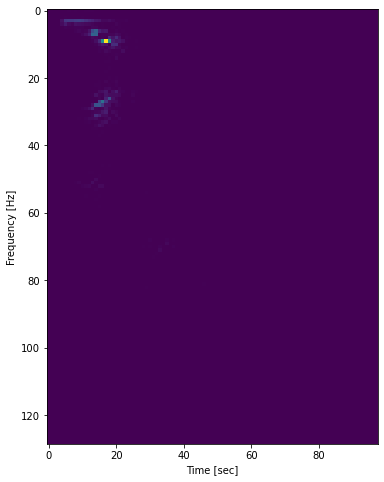

In [10]:
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.figure(figsize=(30,8))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [11]:
spectrogram

array([[1.66308160e-14, 1.12821312e-13, 2.51992336e-14, ...,
        4.29080979e-13, 7.33878629e-14, 1.90876736e-15],
       [4.50412580e-12, 2.07763732e-12, 1.89808477e-12, ...,
        1.36527638e-12, 2.50395277e-12, 1.95471053e-11],
       [1.44310189e-11, 7.66849854e-13, 1.25780327e-14, ...,
        7.47537123e-13, 5.50273640e-13, 1.44066304e-11],
       ...,
       [1.18620535e-22, 1.13544171e-22, 1.88425887e-21, ...,
        1.05176639e-23, 6.43117629e-22, 1.63594669e-22],
       [2.02346407e-22, 7.38036238e-23, 1.94833407e-21, ...,
        3.01616329e-23, 2.68529439e-22, 8.79428953e-23],
       [1.19581960e-22, 1.05169705e-22, 9.39565296e-22, ...,
        2.27931324e-23, 4.25261125e-23, 1.10043438e-23]], dtype=float32)

In [12]:
spectrogram.size

12642

In [13]:
sample_rate

22050

In [14]:
samples.size

22050

In [15]:
duration = float(len(samples)/sample_rate)

In [16]:
duration

1.0

In [17]:
samplesR = librosa.resample(samples, sample_rate, 8000)

<ipython-input-17-c2bd579d8179>:1: FutureWarning: Pass orig_sr=22050, target_sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samplesR = librosa.resample(samples, sample_rate, 8000)


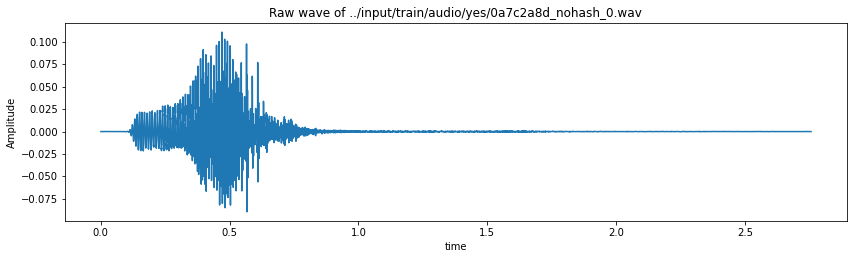

In [18]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samplesR), 8000), samplesR)

<ipython-input-19-a2cd3ce95e2f>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


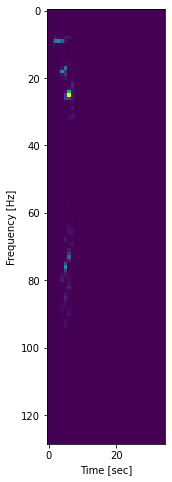

In [19]:
frequencies, times, spectrogram = signal.spectrogram(samplesR, 8000)

plt.figure(figsize=(30,8))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [20]:
spectrogram

array([[1.00337815e-13, 6.85004220e-10, 2.05420703e-09, ...,
        3.53570553e-13, 2.89694856e-14, 7.18805441e-14],
       [4.31215746e-13, 1.39287040e-10, 3.44207468e-10, ...,
        6.58754084e-13, 2.22166293e-13, 8.90016956e-14],
       [2.69683527e-13, 3.31497108e-10, 3.09869241e-10, ...,
        6.41479762e-13, 4.00131707e-12, 8.88826773e-14],
       ...,
       [3.88998475e-18, 1.25014241e-16, 6.84943325e-15, ...,
        1.33643798e-18, 2.28861747e-18, 8.13094373e-20],
       [9.83872919e-19, 3.80591458e-17, 9.24253341e-16, ...,
        3.77285220e-19, 1.78932856e-18, 6.66155172e-19],
       [1.31036434e-19, 9.35016758e-18, 7.84747322e-18, ...,
        1.41212707e-19, 5.08081526e-19, 4.50000625e-19]], dtype=float32)

In [21]:
spectrogram.size

4515

In [22]:
samplesR

array([-1.3187449e-05, -7.0529211e-05, -5.9855702e-05, ...,
       -1.4686466e-05, -6.0283779e-05, -3.8364164e-05], dtype=float32)

In [23]:
samplesR.size

8000

In [24]:
durationR = float(len(samplesR)/8000)

In [25]:
durationR

1.0

### Number of recordings

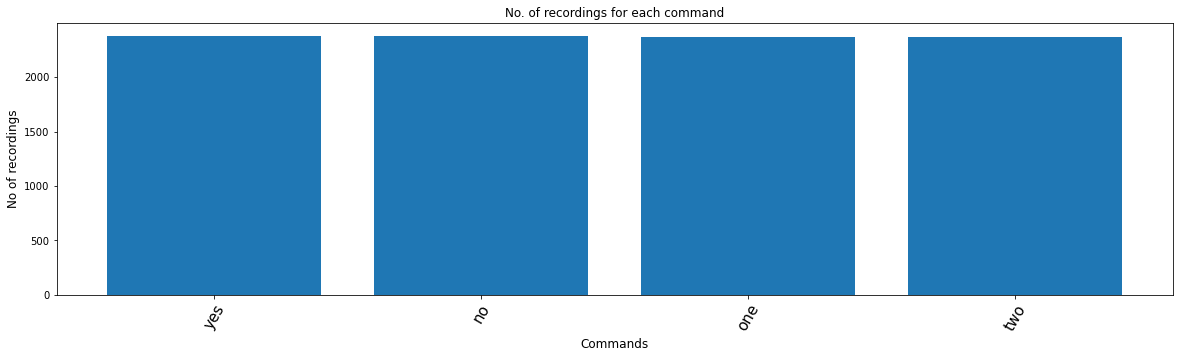

In [26]:
#find count of each label and plot bar graph
labels = ["yes", "no", "one", "two"]
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(audios_dir + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(20,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

### Duration of recordings

(array([4.000e+00, 1.200e+01, 3.800e+01, 4.200e+01, 5.300e+01, 1.260e+02,
        1.020e+02, 1.940e+02, 2.380e+02, 8.686e+03]),
 array([0.4266875 , 0.48401875, 0.54135   , 0.59868125, 0.6560125 ,
        0.71334375, 0.770675  , 0.82800625, 0.8853375 , 0.94266875,
        1.        ]),
 <BarContainer object of 10 artists>)

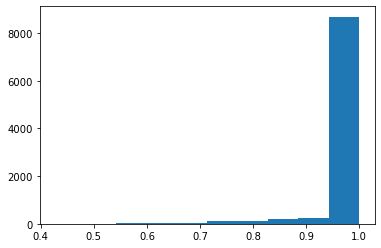

In [27]:
duration_of_recordings=[]
labels = ["yes", "no", "one", "two"]
for label in labels:
    waves = [f for f in os.listdir(audios_dir + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(audios_dir + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

### Resampling / Removing records below 1 second

In [28]:

labels = ["yes", "no", "one", "two"]
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(audios_dir + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(audios_dir + '/' + label + '/' + wav)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes


<ipython-input-28-d88953c142f3>:9: FutureWarning: Pass orig_sr=22050, target_sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples = librosa.resample(samples, sample_rate, 8000)


no
one
two


In [29]:
len(all_wave[8400])

8000

(array([   0.,    0.,    0.,    0.,    0., 8498.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

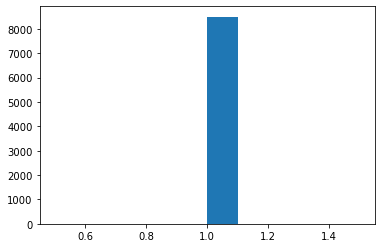

In [30]:
duration_of_recordings_resampled=[]
for s in all_wave:
    duration_of_recordings_resampled.append(float(len(s)/8000))

plt.hist(np.array(duration_of_recordings_resampled))

In [31]:
data = []
labels = []

for wave in all_wave:
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    #file = audios[i]
    
    frequencies, times, spectrogram = signal.spectrogram(wave, 8000)

    # convert the image data to NumPy arrays while scaling the pixel
    # intensities to the range [0, 255]
    #image = np.array(image)/255.0
    
    # update the data and labels lists, respectively
    
    data.append(spectrogram[:128,:48])
        
    #else:
        #   print(spectrogram.shape)

In [32]:
data = np.array(data)

In [33]:
data.shape

(8498, 128, 35)

<ipython-input-34-7b4685ae27ea>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


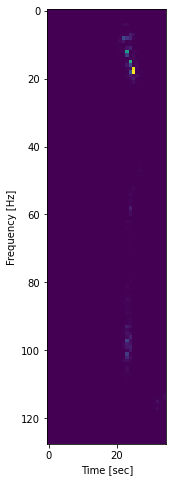

In [34]:
plt.figure(figsize=(30,8))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(data[4])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [35]:
# convert the labels to NumPy arrays while scaling the pixel
labels = np.array(all_label)

In [36]:
# perform one-hot encoding on the labels - Convert the output labels to integer encoded:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ls = le.fit_transform(labels)

In [37]:
ls

array([3, 3, 3, ..., 2, 2, 2], dtype=int64)

In [38]:
labels_categoricals = to_categorical(ls)

In [39]:
labels_categoricals

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [40]:
labels_categoricals.shape

(8498, 4)

### Load Audio Data

In [41]:
# partition the data into training,cross-validation and testing splits using 60%,20% and 20% of data
(trainX, testX, trainY, testY) = train_test_split(data, labels_categoricals,test_size=0.20, stratify=labels_categoricals, random_state=42)
(trainX, cvX, trainY, cvY) = train_test_split(trainX, trainY,test_size=0.25, stratify=trainY, random_state=42)

In [42]:
print("Train data size : ",trainX.shape)
print("Cross-Validation data size : ",cvX.shape)
print("Test data size : ",testX.shape)

Train data size :  (5098, 128, 35)
Cross-Validation data size :  (1700, 128, 35)
Test data size :  (1700, 128, 35)


In [43]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 128, 35

if K.image_data_format() == 'channels_first':
    trainX = trainX.reshape(trainX.shape[0], 1, img_rows, img_cols)
    testX = testX.reshape(testX.shape[0], 1, img_rows, img_cols)
    cvX = cvX.reshape(cvX.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    trainX = trainX.reshape(trainX.shape[0],img_rows, img_cols,1)
    testX = testX.reshape(testX.shape[0],img_rows, img_cols,1)
    cvX = cvX.reshape(cvX.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [44]:
print("Number of training examples :", trainX.shape[0], "and each image is of shape :",trainX.shape)
print("Number of cross validation examples :", cvX.shape[0], "and each image is of shape :",cvX.shape)
print("Number of testing examples :", testX.shape[0], "and each image is of shape :",testX.shape)

Number of training examples : 5098 and each image is of shape : (5098, 128, 35, 1)
Number of cross validation examples : 1700 and each image is of shape : (1700, 128, 35, 1)
Number of testing examples : 1700 and each image is of shape : (1700, 128, 35, 1)


In [45]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
else:
  print("No GPU device found")

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [80]:
#initialize the initial learning rate, number of epochs to train for and batch size
INIT_LR = 1e-3
EPOCHS = 27
batch_size = 32
num_class = 4
#input_shape = (224,224,3) #(513, 800, 3)

In [81]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers import Dropout,Flatten
from tensorflow.keras.layers import (BatchNormalization)

from keras.layers import Conv2D, MaxPooling2D

In [82]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(Conv2D(64, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 35, 8)        40        
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 35, 16)       528       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 17, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 64, 17, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_12 (Dropout)        (None, 64, 17, 16)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 17, 32)       

In [83]:
#from tensorflow.keras.optimizers import Adam
#opt = Adam(lr=INIT_LR)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [85]:
history = model.fit(trainX, trainY, batch_size=batch_size, epochs=EPOCHS, verbose=1, callbacks=[es,mc],validation_data=(cvX, cvY))

Epoch 1/27
160/160 [==============================] - 2s 12ms/step - loss: 1.3815 - accuracy: 0.2734 - val_loss: 1.4210 - val_accuracy: 0.2476
Epoch 2/27
160/160 [==============================] - 2s 10ms/step - loss: 1.2808 - accuracy: 0.3801 - val_loss: 1.6745 - val_accuracy: 0.2476
Epoch 3/27
160/160 [==============================] - 2s 10ms/step - loss: 1.1474 - accuracy: 0.4902 - val_loss: 1.8166 - val_accuracy: 0.2547
Epoch 4/27
160/160 [==============================] - 2s 10ms/step - loss: 0.9995 - accuracy: 0.5722 - val_loss: 1.6870 - val_accuracy: 0.2682
Epoch 5/27
160/160 [==============================] - 2s 10ms/step - loss: 0.9165 - accuracy: 0.6138 - val_loss: 2.3188 - val_accuracy: 0.2924
Epoch 6/27
160/160 [==============================] - 1s 9ms/step - loss: 0.8760 - accuracy: 0.6301 - val_loss: 3.3569 - val_accuracy: 0.2576
Epoch 7/27
160/160 [==============================] - 1s 9ms/step - loss: 0.8256 - accuracy: 0.6661 - val_loss: 1.4732 - val_accuracy: 0.3141
E

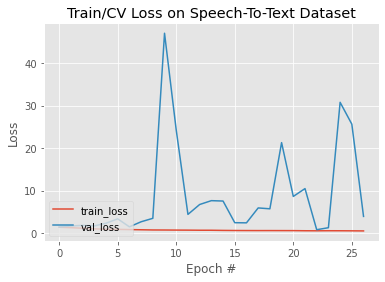

In [86]:
# plot the training loss
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train/CV Loss on Speech-To-Text Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

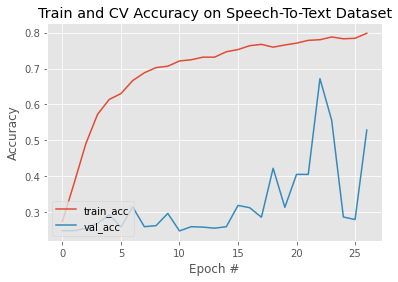

In [87]:
# plot the training accuracy
N = EPOCHS
#plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train and CV Accuracy on Speech-To-Text Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [88]:
best_acc = max(history.history["val_accuracy"])

In [89]:
best_acc*100

67.17647314071655

In [90]:
# make predictions on the testing set
predIdxs = model.predict(testX, batch_size=batch_size)

54/54 [==============================] - 0s 2ms/step


In [91]:
predIdxs

array([[1.60612001e-06, 8.45647417e-04, 9.98898029e-01, 2.54652929e-04],
       [3.57030081e-06, 2.07490521e-03, 9.97181416e-01, 7.40132935e-04],
       [3.40518542e-02, 8.65553319e-01, 7.97748534e-09, 1.00394815e-01],
       ...,
       [5.06323542e-12, 2.88134794e-12, 9.99962449e-01, 3.75028794e-05],
       [2.15043556e-08, 9.99999881e-01, 3.64812514e-09, 8.02756830e-08],
       [2.48725746e-06, 2.32715439e-03, 9.97666597e-01, 3.79718199e-06]],
      dtype=float32)

In [92]:
testX.shape

(1700, 128, 35, 1)

In [93]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [94]:
predIdxs

array([2, 2, 1, ..., 2, 1, 2], dtype=int64)